In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Introduction

This data is abount BigMart Supermarket where differet stores are in differet locations and cities with their products in those store. Main
aim is to predict the sales of product also to find which store is more profitale in which location and cities and which product is in more demand.
So that will able to ow the market demand and supply along with customer taste in each locations respectively which will help the company to improve their
productivity for that particular product which is in more demand. Let's proceed further to predict the sales. Also here we are having two dataset one is train 
data and the other one is test data.

In [2]:
train_df = pd.read_csv("/Users/juhimishra/Downloads/bigdatamart_rep-master/bigdatamart_Train.csv")
test_df = pd.read_csv("/Users/juhimishra/Downloads/bigdatamart_rep-master/bigdatamart_Test.csv")

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Difference of column between Train and test data is only the target column i.e., item_outlet_sales which is not present in test data

In [7]:
print("Train Shape -",train_df.shape)
print("Test Shape -",test_df.shape)

Train Shape - (8523, 12)
Test Shape - (5681, 11)


Train data consist of total 8523 rows and 1 columns while test data is having 5681 rows and 11 columns

In [8]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


from the above static data we can conclude :
1. There are missing data in item_weight column need to fix it using encoding method.
2. Bigmart established in 1985 and last established in 2009.
3. Item visibility is less .
4. Item mrp min is Rs.31 and max is Rs.267 
5. Outlet sales we can see min is rs.33 and max is rs.13086 which showing increasing trend in sales as and when mrp increses sales is also increasing

same we can plot and check the relationship of each feature with target i.e., outlet sales

In [9]:
train_df.isnull().sum().to_frame("Any missing values")

,Any missing values
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
test_df.isnull().sum().to_frame("Any missing values")

,Any missing values
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


in train data we can see that there are two items which contains missing values even in test data too same columns are having missing data. Will treat the same using imputation method using mean for continous column and for categorical column will use mode.

In [11]:
# Concating both train and test data 
train_df['source']='train'
test_df['source']='test'
df = pd.concat([train_df,test_df],ignore_index = True) # don't want index column

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [13]:
df.isnull().sum().to_frame("Missing values present in column")

,Missing values present in column
Item_Identifier,0
Item_Weight,2439
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,4016
Outlet_Location_Type,0


above we got missing values only for item weight and outlet size but after joining both train ans test data we can see that 
even in outlet sales also we are having missing values this is because this column was only in training data so when we combined
both the data in test data item outlet sales which were not present prior showing nan value so these become missing data whic we eed to treat 
for further process.

In [14]:
print("Data Shape after concat -",df.shape)

Data Shape after concat - (14204, 13)


here 13th column is source column which we created mentioning train and test for reference

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

There are Some object data and some float & integer form data

In [16]:
# Check the name of coloumns which contain string
df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')

In [17]:
# Check the no. of coloumns which contain string
len(df.select_dtypes(include='object').columns)

8

In [18]:
# Check the name of coloumns which contain numerical value
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# Filling null values 

In [19]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())# data is continous so using mean
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0]) # data is categorical so using mode

In [20]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Cleaning the data

In [21]:
df['Item_Identifier'].value_counts()

FDN21    10
FDX32    10
FDO24    10
FDP37    10
FDD17    10
         ..
FDH58     7
FDM10     7
NCW54     7
NCL42     7
FDR51     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [22]:
df['Item_Weight'].value_counts()

12.792854    2439
17.600000     135
12.150000     127
10.500000     123
13.650000     115
             ... 
8.380000        7
7.145000        7
9.035000        6
4.615000        6
7.850000        6
Name: Item_Weight, Length: 416, dtype: int64

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

here we can see that low fat and lf are safe but differently intialized similarly for regular and reg so we need to join both respectively 

In [24]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
train_df['Item_Fat_Content']=train_df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [26]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [28]:
df['Item_Visibility'].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [29]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [30]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [31]:
df['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [32]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [33]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [34]:
df['Year'] = df['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
df = df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,train,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,34


Converted the year to integer form as system will not accept date format

# EDA

### Univariate comparison via plotting 

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

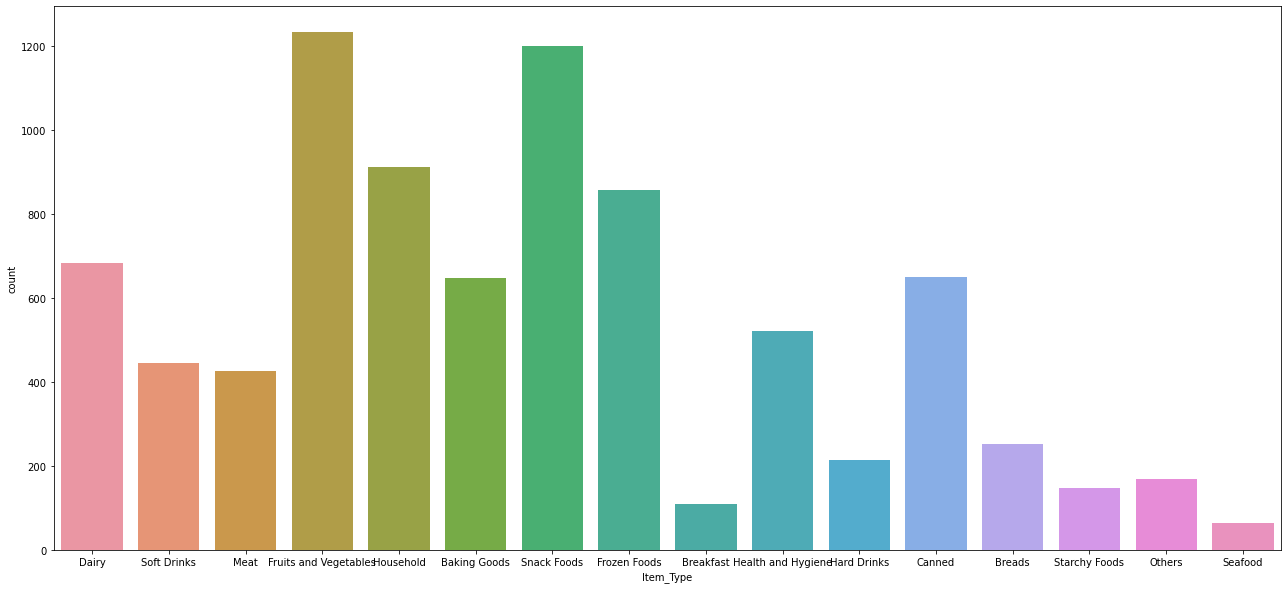

In [35]:
plt.figure(figsize = (22,10))
sns.countplot(train_df.Item_Type)

from above count plot we can see that fruits and vegetables product are more in demand and mostly sold after that snack foods are in demand. Least in demand is seafood followed by breakfast which is second least in demand in the market. So from this insight we can come to conclusion which item to be kept more in inventory.


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

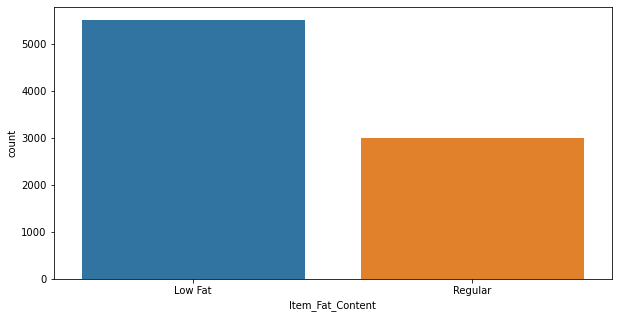

In [36]:
plt.figure(figsize = (10,5))
sns.countplot(train_df.Item_Fat_Content)

Low fat product is in more demand compare to regular one

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

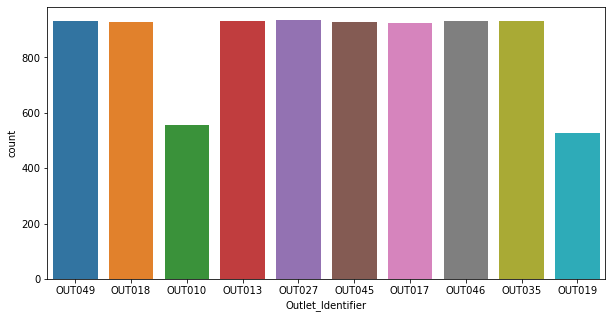

In [37]:
plt.figure(figsize = (10,5))
sns.countplot(train_df.Outlet_Identifier)

from this got the count of stores consist of different store id 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

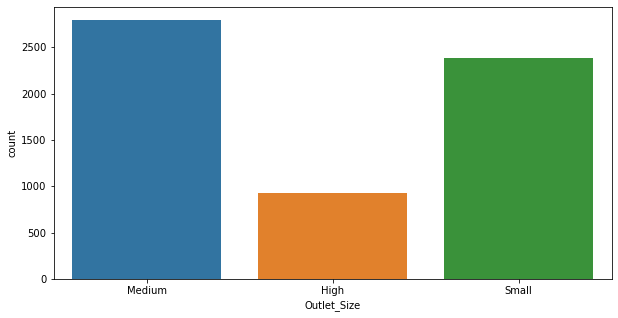

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(train_df.Outlet_Size)

No of stores of medium size are more compare to others . 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

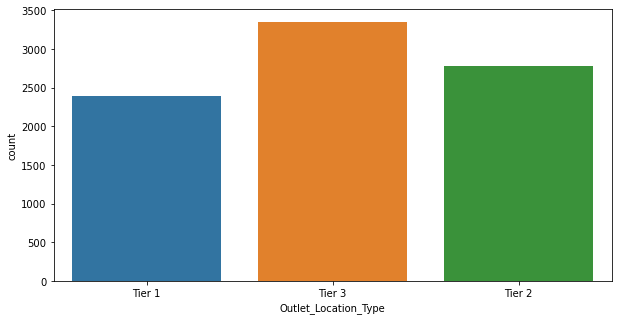

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(train_df.Outlet_Location_Type)

Most of the stores are in Tier 3 cities

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

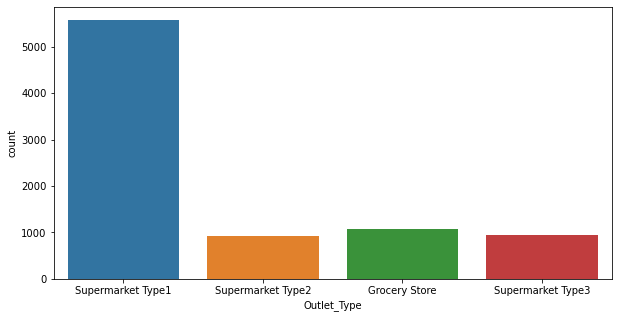

In [40]:
plt.figure(figsize = (10,5))
sns.countplot(train_df.Outlet_Type)

from the above graph we can see that Supermarket type1 are very high in number compare to others. Grocery store are 2nd highest

### Bivariate Comparison (Feature with target)

#### 1) Item Fat Content vs Item Outlet Sales

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

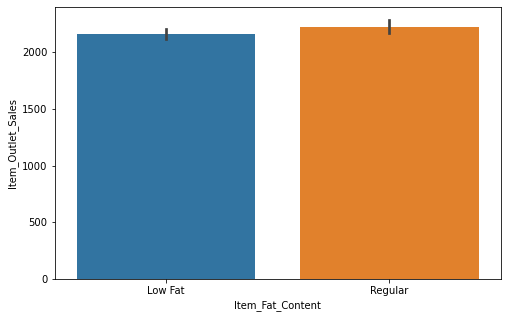

In [41]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df)

comparing item fat content to item outlet sales we concluded that regular item are more seleable and generating revenue more compare to low fat product

#### 2) Item Visiblity vs Item Outlet Sales

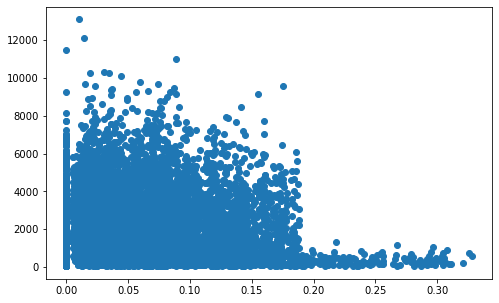

In [43]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)


Though the visibility of products which are low visible are more in number as we can see via scatter plot still not affecting sales. Rather we
can see that product which are more visible are not having so much of sales

#### 3) Item Type to Item Outlet Sales

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

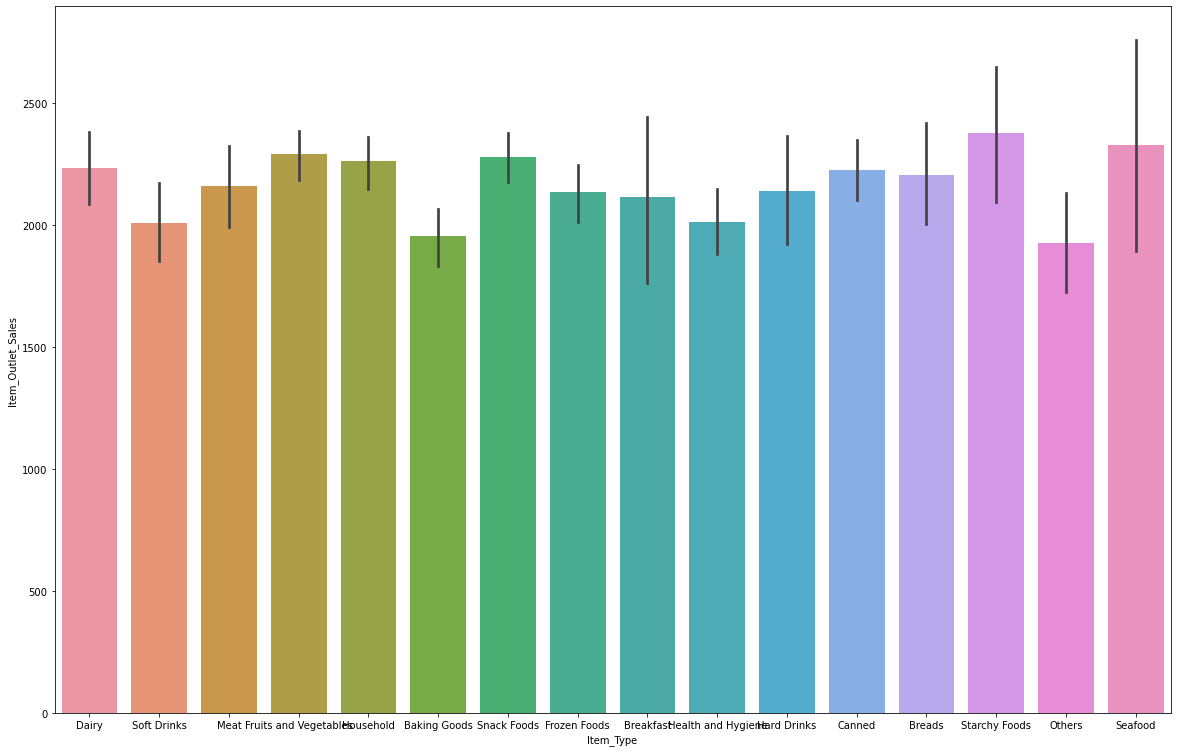

In [45]:
plt.figure(figsize=(20,13))
sns.barplot('Item_Type','Item_Outlet_Sales',data=df)

Starchy foods and sea foods almost are generating more revenue compare to others but as we seen in univariate that vegetables fruits were in more but profit are less compare to this so company can focus more on these products which are generating more revenue for them. Though supply is more for fruits and vegetables but profitable product for company are Strachy foods and sea foods

#### 4) Item MRP vs Item Outlet Sales

Text(0.5, 1.0, 'relation between Item MRP vs Outlet Sales')

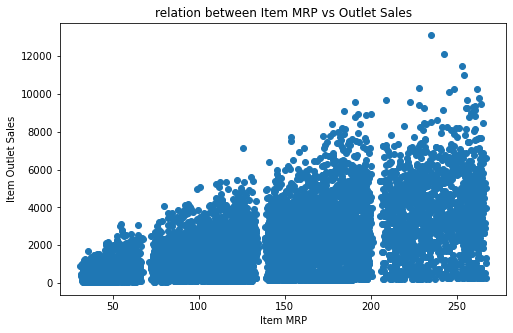

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=df)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.title('relation between Item MRP vs Outlet Sales')

Items which are having higher mrp sold more in market

#### 5) Outlet Size vs Item Outlet Sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

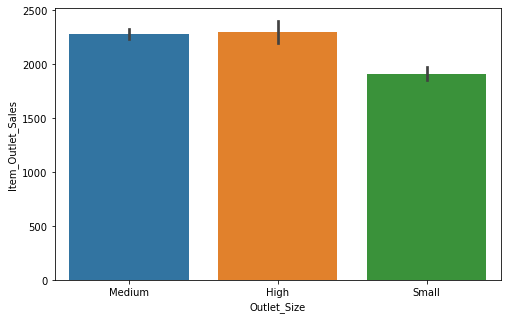

In [49]:
plt.figure(figsize=(8,5))
sns.barplot('Outlet_Size','Item_Outlet_Sales',data=df)

above in univariate count we seen that medium size stores were more but here we can see that revenue from High and medium atores are almost same. That means not affecting much though the number of stores of high size is less in locality or city

#### 6) Outlet Location vs Item Outlet Sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

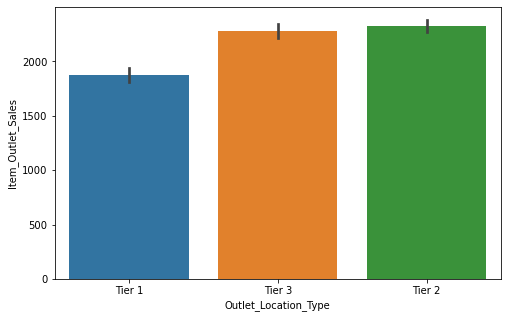

In [51]:
plt.figure(figsize=(8,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',data=df)

Most of the sales are from tier2 followed by tier3 cities which are having almost negligible difference. Less revenue generatng cities are Tier1 where company need to focus more to increase their sales 

#### 7) Outlet Type vs Item Outlet Sales

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

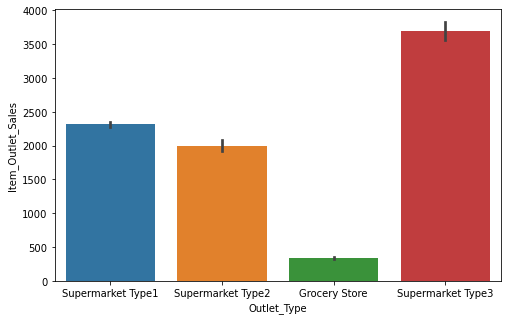

In [52]:
plt.figure(figsize=(8,5))
sns.barplot('Outlet_Type','Item_Outlet_Sales',data=df)

clearly we can see that Supermarket Type 3 is generating more revenue and having pretty good sales compare to any of the store type

### Multivariate  Analysis

### 1) Item Type by Item Fat Content vs Item Outlet Sales

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

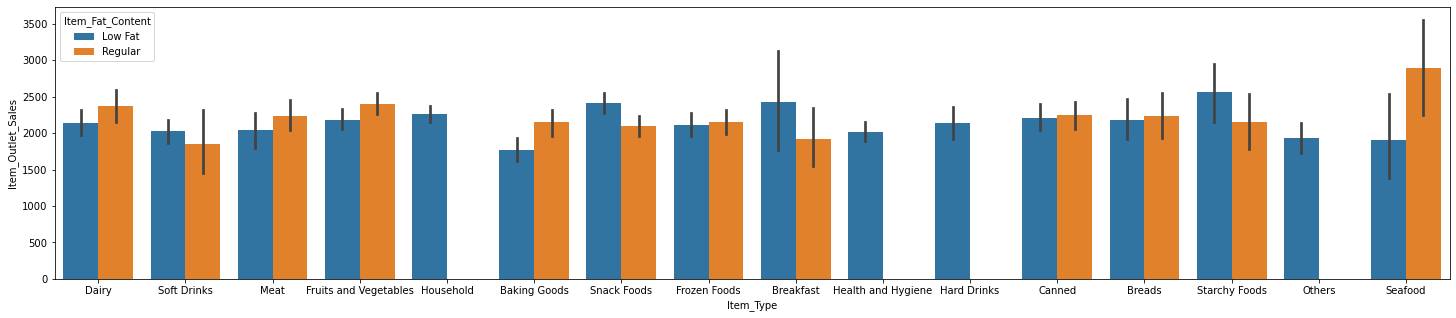

In [53]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=df)

Here we compare two item to sales just to see whether item type or fat content is changing the data or revenue but got the same result that is seafood is in more demand.

### 2) Outlet Location Type by Outlet Type vs Item Outlet Sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

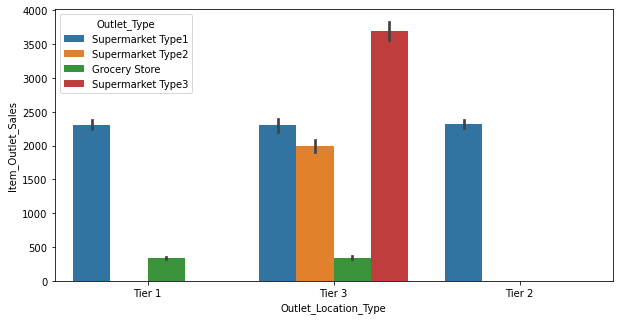

In [54]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=df)

from the above graph we concluded that Supermarket type3 is in more demand compare to any of the market in tier 3 cities while in tier 2 cities Supermarket type1 is in more demand similarly in Tier1 cities again Supermarket type1 is in mode demand
so here we can see that Tier1 and Tier2 cities are being captured by supermarket Type1 mostly and are more profitable compare to others.

### Feature Enginering

In [55]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [57]:
le = LabelEncoder()


In [59]:
var_mod = ['Item_Type']

for i in var_mod:
    df[i] = le.fit_transform(df[i])

No of columns are more in this data i will apply one hot encoder so the no of coulmn will be more in number so applied label encoder to avoid no of columns to be increased

In [61]:
df = df.drop(columns=['Item_Identifier'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Year
0,9.30,Low Fat,0.016047,4,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,22
1,5.92,Regular,0.019278,14,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,12
2,17.50,Low Fat,0.016760,10,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,22
3,19.20,Regular,0.000000,6,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,train,23
4,8.93,Low Fat,0.000000,9,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,34


for rest of the categorical column will apply one hot encoder to tranform data into numeric for further process

In [63]:
df = pd.get_dummies(data=df, drop_first=True)
df.shape

(14204, 24)

In [64]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Year,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,source_train
0,9.30,0.016047,4,249.8092,3735.1380,22,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
1,5.92,0.019278,14,48.2692,443.4228,12,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
2,17.50,0.016760,10,141.6180,2097.2700,22,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3,19.20,0.000000,6,182.0950,732.3800,23,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,8.93,0.000000,9,53.8614,994.7052,34,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1


In [66]:
df.source_train.unique()

array([1, 0], dtype=uint8)

## Removing Skewness

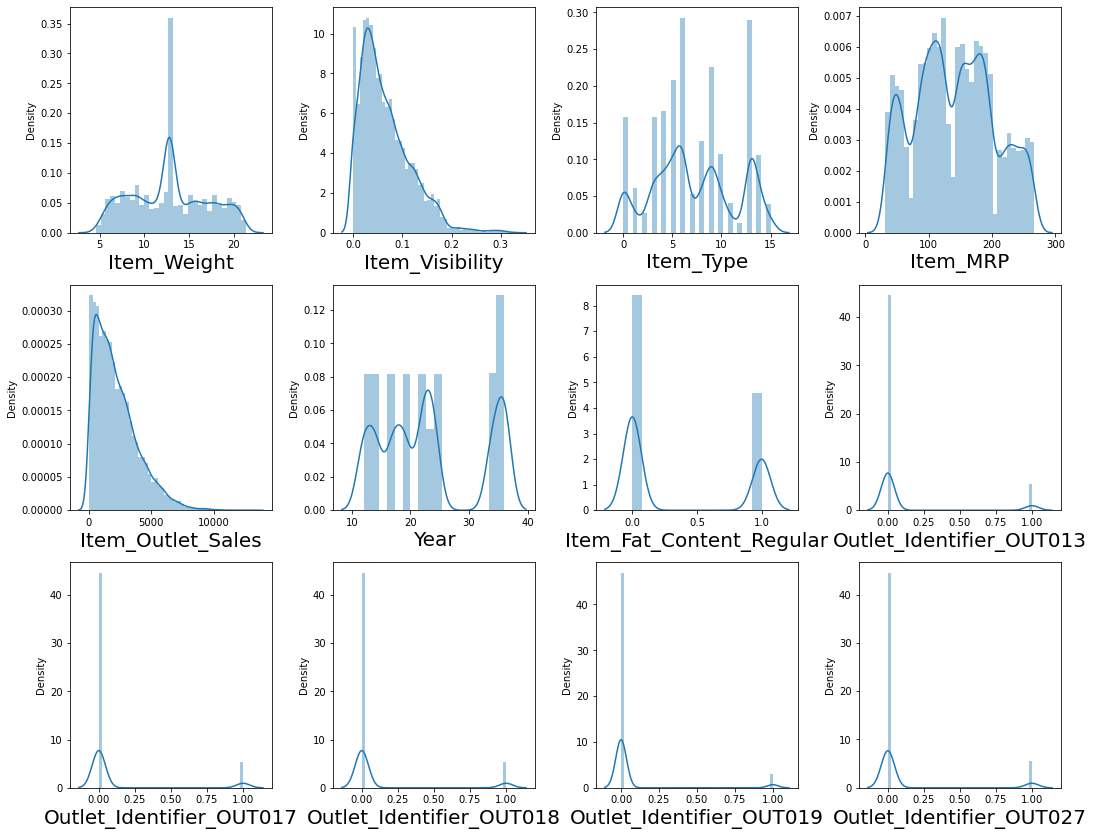

In [70]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [71]:
df.skew()

Item_Weight                      0.111314
Item_Visibility                  1.195175
Item_Type                        0.099574
Item_MRP                         0.130728
Item_Outlet_Sales                1.177531
Year                             0.396465
Item_Fat_Content_Regular         0.613645
Outlet_Identifier_OUT013         2.504047
Outlet_Identifier_OUT017         2.515681
Outlet_Identifier_OUT018         2.512180
Outlet_Identifier_OUT019         3.634521
Outlet_Identifier_OUT027         2.497113
Outlet_Identifier_OUT035         2.507527
Outlet_Identifier_OUT045         2.509852
Outlet_Identifier_OUT046         2.507527
Outlet_Identifier_OUT049         2.507527
Outlet_Size_Medium              -0.453089
Outlet_Size_Small                0.978942
Outlet_Location_Type_Tier 2      0.738898
Outlet_Location_Type_Tier 3      0.437946
Outlet_Type_Supermarket Type1   -0.649044
Outlet_Type_Supermarket Type2    2.512180
Outlet_Type_Supermarket Type3    2.497113
source_train                    -0

we can only remove data from continous variable not from categorical one so below mentioning all the continous data.

In [74]:
feature = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Year',]

In [72]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [75]:
df[feature] = scaler.fit_transform(df[feature].values)

### Checking Outliers

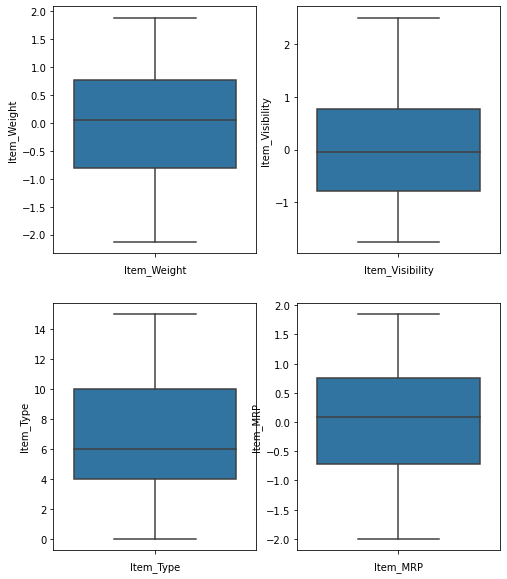

In [79]:
plt.figure(figsize=(8,10))

graph=1

for column in df.columns:
    if graph<=4:
        ax = plt.subplot(2,2,graph)
        sns.boxplot(y=df[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

There is no outliers so now we can proceed for training and testing data 

In [80]:
train = df.loc[df['source_train']==1]
test = df.loc[df['source_train']==0]

In [82]:
train.shape

(8523, 24)

In [83]:
test.shape

(5681, 24)

In [84]:
train.drop(columns =['source_train'],inplace = True)

In [85]:
test.drop(columns =['source_train','Item_Outlet_Sales'],inplace = True)

In [86]:
# Splitting data into feature and target
x_train = train.drop(columns = ['Item_Outlet_Sales'])
y_train = train['Item_Outlet_Sales']

Here x contains all the feature data while y contains target

In [87]:
# Scaling feature data
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_train)
x_scaler

array([[-0.81756914, -1.14733811, -0.76647929, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.74182731, -1.03735908,  1.6089627 , ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.0873898 , -1.12278224,  0.6587859 , ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.48948934, -0.54254643,  0.1836975 , ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.37484728,  1.45926865,  1.3714185 , ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.49784564, -0.27551764,  1.6089627 , ...,  0.72680189,
        -0.34955064, -0.35102831]])

# Building Model

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
lr = LinearRegression()

In [93]:
lr.fit(x_train,y_train)
pred = lr.predict(x_test)


In [95]:
lr_score = lr.score(x_train,y_train)
lr_score

0.5587719637087167

In [102]:
print(r2_score(y_test,pred))

0.5646327079265421


In [108]:
print(cross_val_score(lr,x_train,y_train,cv = 5).mean())

0.5573983021740523


In [106]:
lr_mae = round(mae(y_test,pred),2)
lr_mae

781.73

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dt = DecisionTreeRegressor()

In [98]:
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
dt.score(x_train,y_train)

1.0

In [109]:
print(cross_val_score(dt,x_train,y_train,cv = 5).mean())

0.14635992785867907


In [110]:
dt_mae = round(mae(y_test,pred),2)
dt_mae

781.73

In [100]:
rf = RandomForestRegressor()

In [101]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
rf.score(x_train,y_train)

0.9377420068853547

In [111]:
print(cross_val_score(rf,x_train,y_train,cv = 5).mean())

0.5530742507612629


In [112]:
rf_mae = round(mae(y_test,pred),2)
rf_mae

781.73

So as per above score LinearRegression is the best model. Will do Hyperparameter tuning on LinearRegression

# Hyperparameter Tuning

In [119]:
from xgboost import XGBRegressor


In [122]:
xg = XGBRegressor(n_estimators=1000,learning_rate=0.05,max_depth =3,n_jobs=-1)

In [123]:
xg.fit(x_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
pred = xg.predict(x_test)
pred

array([ 513.76996, 1206.1874 , 2746.0925 , ..., 3485.172  ,  613.6563 ,
       1594.2607 ], dtype=float32)

In [128]:
final_lr =xg.score(x_train,y_train)*100
final_lr

71.99196067739543

# Saving the model

In [130]:
import joblib
joblib.dump(final_lr,'FinalmodelBigMart.pk1')

['FinalmodelBigMart.pk1']